# Model Stuff

In [1]:
from ipynb.fs.full.functions import *

In [2]:
# Data to create our model
df = pd.read_csv('../data/clean_data.csv')
df = add_binary_and_drop(df, drop='subreddit', repl_w_zero='AMA')
df = remove_keywords(df, col_to_modify='body', remove_from='AMA')
df = remove_keywords(df, col_to_modify='body', remove_from='AskReddit')
df = remove_deleted_comments(df, col_to_modify='body', repl_w_nan='[deleted]')

In [3]:
# Model X, and y
# X = df.drop(columns=['subreddit'])
X = df['body']
y = df['subreddit_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=3)

In [4]:
# TEST data (not part of train/test/split)
df1 = pd.read_csv('../data/2021-04-27_1812_AMA_comments.csv')
df2 = pd.read_csv('../data/2021-04-27_1812_AskReddit_comments.csv')
df_test_pred = pd.concat([df1, df2], axis=0)

In [5]:
df_test_pred = drop_cols_cleaning(df_test_pred)
df_test_pred = add_binary_and_drop(df_test_pred, drop='subreddit', repl_w_zero='AMA')

In [6]:
df_test_pred = remove_keywords(df_test_pred, col_to_modify='body', remove_from='AMA')
df_test_pred = remove_keywords(df_test_pred, col_to_modify='body', remove_from='AskReddit')
df_test_pred = remove_deleted_comments(df_test_pred, col_to_modify='body', repl_w_nan='[deleted]')
df_test_pred.shape


(1930, 8)

In [7]:
df_test_pred = df_test_pred.sample(n=df_test_pred.shape[0], random_state=3)

X_new = df_test_pred['body']
y_new = df_test_pred['subreddit_binary'] 

### MAKE MODEL FUNCTION(S)

In [8]:
print(f'{X_train.shape}, {y_train.shape}')
print(f'{X_test.shape}, {y_test.shape}')

print(f'\n\n{X.shape}, {y.shape}')
print(f'{X_new.shape}, {y_new.shape}')


(7298,), (7298,)
(2433,), (2433,)


(9731,), (9731,)
(1930,), (1930,)


<h2> (gridsearch) CountVectorizer(), LogisticRegression() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [9]:
gs_cv_lgr = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    LogisticRegression()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect LogReg')



Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [14]:
print(gs_cv_lgr.model.best_score_)
print(gs_cv_lgr.model.best_estimator_)

0.7052590909517684
Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('logisticregression', LogisticRegression())])


In [10]:
X_gs_cv_lgr = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    LogisticRegression()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect LogReg')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [15]:
print(X_gs_cv_lgr.model.best_score_)
print(X_gs_cv_lgr.model.best_estimator_)

0.6989007253365258
Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression())])


<h2 style="color:red;"> (gridsearch) TfidfVectorizer(), LogisticRegression() </h2>
<h2 style="color:red;"> BEST! F1 score: 71.16% </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [11]:

gs_tv_lgr = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    LogisticRegression()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf LogReg')



Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [16]:
print(gs_tv_lgr.model.best_score_)
print(gs_tv_lgr.model.best_estimator_)

0.7137560911489386
Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('logisticregression', LogisticRegression())])


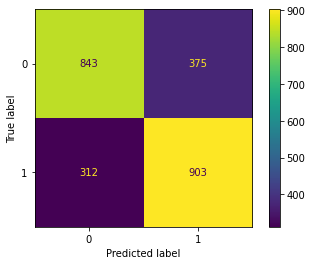

In [20]:
plot_confusion_matrix(gs_tv_lgr.model, X_test, y_test)

In [12]:

X_gs_tv_lgr = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    LogisticRegression()), 
    X_train=X, X_test=X_new, y_train=y, y_test=y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf LogReg')

compare_lgr = pd.concat([gs_cv_lgr.df, X_gs_cv_lgr.df, gs_tv_lgr.df, X_gs_tv_lgr.df], axis=1)
compare_lgr

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Train/Test cVect LogReg,Xy/new cVect LogReg,Train/Test Tfidf LogReg,Xy/new Tfidf LogReg
F1 Score,0.724341,0.650980,0.724428,0.679302
Recall Score,0.758025,0.693835,0.743210,0.711599
Accuracy,0.711878,0.631088,0.717633,0.666839
Balanced Accuracy,0.711935,0.631604,0.717664,0.667207
Precision Score,0.693524,0.613112,0.706573,0.649809
Average Precision Score,0.757351,0.664860,0.790564,0.707293
ROC AUC Score,0.780030,0.696882,0.798083,0.735097
True Positive,811.000000,554.000000,843.000000,606.000000
False Negative,407.000000,419.000000,375.000000,367.000000
False Positive,294.000000,293.000000,312.000000,276.000000


In [17]:
print(X_gs_tv_lgr.model.best_score_)
print(X_gs_tv_lgr.model.best_estimator_)

0.71102542135343
Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('logisticregression', LogisticRegression())])


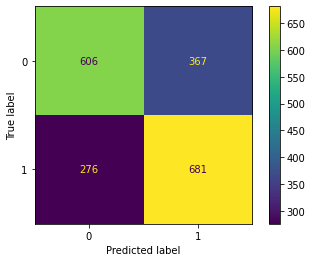

In [18]:
plot_confusion_matrix(X_gs_tv_lgr.model, X_new, y_new)

<h2> (gridsearch) CountVectorizer(), RandomForestClasifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [13]:
gs_cv_rfc = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    RandomForestClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect RFC')



Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [ ]:
X_gs_cv_rfc = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    RandomForestClassifier()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect RFC')

<h2 style="color:black;"> (gridsearch) TfidfVectorizer(), RandomForestClassifier() </h2>
<!-- h2 style="color:red;"> BEST! test score: 72.17% </h2 -->

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:

gs_tv_rfc = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    RandomForestClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf RFC')



In [21]:
X_gs_tv_rfc = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    RandomForestClassifier()), 
    X_train=X, X_test=X_new, y_train=y, y_test=y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf RFC')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Xy/new Tfidf RFC
F1 Score,0.664260
Recall Score,0.672936
Accuracy,0.662694
Balanced Accuracy,0.662779
Precision Score,0.655804
Average Precision Score,0.682031
ROC AUC Score,0.728577
True Positive,635.000000
False Negative,338.000000
False Positive,313.000000


In [ ]:
compare_rfc = pd.concat([gs_cv_rfc.df, X_gs_cv_rfc.df, gs_tv_rfc.df, X_gs_tv_rfc.df], axis=1)
compare_rfc

<h2> (gridsearch) CountVectorizer(), DecisionTreeClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_cv_tree = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    DecisionTreeClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect DTree')



In [ ]:
X_gs_cv_tree = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    DecisionTreeClassifier()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect DTree')


<h2 style="color:black;"> (gridsearch) TfidfVectorizer(), DecisionTreeClassifier() </h2>
<!-- h2 style="color:red;"> BEST! test score: 72.17% </h2 -->

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
# ### Best Train ###

gs_tv_tree = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    DecisionTreeClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf DTree')


In [22]:
## FIT BEST onto X, and try on fresh data!!

X_gs_tv_tree = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    DecisionTreeClassifier()), 
    X_train=X, X_test=X_new, y_train=y, y_test=y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf DTree')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Xy/new Tfidf DTree
F1 Score,0.635849
Recall Score,0.704284
Accuracy,0.600000
Balanced Accuracy,0.600857
Precision Score,0.579536
Average Precision Score,0.570740
ROC AUC Score,0.613684
True Positive,484.000000
False Negative,489.000000
False Positive,283.000000


In [ ]:
compare_tree = pd.concat([gs_cv_tree.df, X_gs_cv_tree.df, gs_tv_tree.df, X_gs_tv_tree.df], axis=1)
compare_tree

<h2> (gridsearch) CountVectorizer(), GradientBoostingClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_cv_gb = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    GradientBoostingClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect gBoost')


In [ ]:
X_gs_cv_gb = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    GradientBoostingClassifier()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect gBoost')


<h2> (gridsearch) TfidfVectorizer(), GradientBoostingClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_tv_gb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    GradientBoostingClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf gBoost')


In [23]:
X_gs_tv_gb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    GradientBoostingClassifier()), 
    X, X_new, y, y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf gBoost')
X_gs_tv_gb.df

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Xy/new Tfidf gBoost
F1 Score,0.672023
Recall Score,0.742947
Accuracy,0.640415
Balanced Accuracy,0.641258
Precision Score,0.613460
Average Precision Score,0.646071
ROC AUC Score,0.687783
True Positive,525.000000
False Negative,448.000000
False Positive,246.000000


In [ ]:
compare_gb = pd.concat([gs_cv_gb.df, X_gs_cv_gb.df, gs_tv_gb.df, X_gs_tv_gb.df], axis=1)
compare_gb

In [ ]:
X_gs_tv_gb.plot_confusion_matrix(X_new, y_new)

<h2> (gridsearch) CountVectorizer(), BaggingClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_cv_bc = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    BaggingClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect Bagging')


In [ ]:
X_gs_cv_bc = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    BaggingClassifier()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect Bagging')


<h2> (gridsearch) TfidfVectorizer(), BaggingClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_tv_bc = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    BaggingClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf Bagging')


In [24]:
X_gs_tv_bc = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    BaggingClassifier()), 
    X, X_new, y, y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf Bagging')
X_gs_tv_bc.df

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Xy/new Tfidf Bagging
F1 Score,0.614549
Recall Score,0.591432
Accuracy,0.632124
Balanced Accuracy,0.631790
Precision Score,0.639548
Average Precision Score,0.658243
ROC AUC Score,0.700817
True Positive,654.000000
False Negative,319.000000
False Positive,391.000000


In [ ]:
compare_bag = pd.concat([gs_cv_bc.df, X_gs_cv_bc.df, gs_tv_bc.df, X_gs_tv_bc.df], axis=1)
compare_bag

<h2> (gridsearch) CountVectorizer(), AdaBoostClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_cv_ab = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    AdaBoostClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect adaBst')


In [26]:
X_gs_cv_ab = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    AdaBoostClassifier()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect adaBst')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Xy/new cVect adaBst
F1 Score,0.667905
Recall Score,0.751306
Accuracy,0.629534
Balanced Accuracy,0.630535
Precision Score,0.601171
Average Precision Score,0.602213
ROC AUC Score,0.651219
True Positive,496.000000
False Negative,477.000000
False Positive,238.000000


<h2> (gridsearch) TfidfVectorizer(), AdaBoostClassifier() </h2>

#### BEST Params:
 - max_features: 
 - ngram_range: 
 - stop_words: 

In [ ]:
gs_tv_ab = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    AdaBoostClassifier()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf adaBst')


In [25]:
X_gs_tv_ab = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    AdaBoostClassifier()), 
    X, X_new, y, y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf adaBst')


Fitting 5 folds for each of 48 candidates, totalling 240 fits


,Xy/new Tfidf adaBst
F1 Score,0.647233
Recall Score,0.684431
Accuracy,0.630052
Balanced Accuracy,0.630499
Precision Score,0.613871
Average Precision Score,0.625227
ROC AUC Score,0.663331
True Positive,561.000000
False Negative,412.000000
False Positive,302.000000


In [ ]:
compare_ab = pd.concat([gs_cv_ab.df, X_gs_cv_ab.df, gs_tv_ab.df, X_gs_tv_ab.df], axis=1)
compare_ab

In [ ]:
compare_rfc

In [ ]:
compare_tree

In [ ]:
compare_gb

In [ ]:
compare_bag

In [ ]:
compare_lgr